In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [64]:
0.1 ** 2

0.010000000000000002

In [85]:
# priors
v_pr_y = np.linspace(0.0, 1.0, 10000)/1000
pr_pos_y = 0.999

def fn_pr_y(v_pr_y, sensitivity, specificity = None, rep = 1):
    v_pr_n = 1 - v_pr_y

    if specificity is None:
        specificity = sensitivity
        
    pr_pos_y = sensitivity ** rep
    pr_neg_y = 1 - pr_pos_y
    pr_neg_n = 1 - (1 - specificity) ** rep
    pr_pos_n = 1 - pr_neg_n

    v_pr_y_pos = pr_pos_y * v_pr_y / (pr_pos_y * v_pr_y + pr_pos_n * v_pr_n)
    v_pr_y_neg = pr_neg_y * v_pr_y / (pr_neg_y * v_pr_y + pr_neg_n * v_pr_n)

    return v_pr_y_pos, v_pr_y_neg



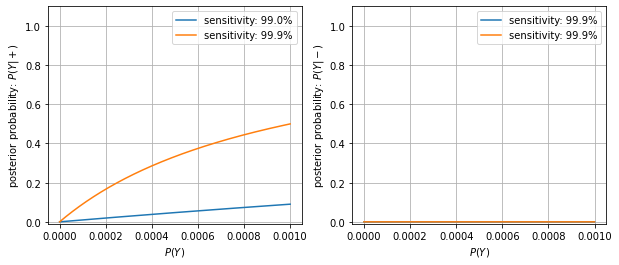

In [86]:
plt.figure(figsize=(10,4))
l_ss = [[0.99,None], [0.999,None]]
plt.subplot(1,2,1)
for sens,spec in l_ss:
    v_pr_i_pos, v_pr_i_neg = fn_pr_y(v_pr_y, sens, spec, rep = 1)
    plt.plot(v_pr_y, v_pr_i_pos, label='sensitivity: ' + str(100*sens) + '%')
    #plt.plot(v_pr_i, v_pr_i_neg, label='sensitivity: ' + str(100*pr_pos_i) + ', $P(I|-)$')
plt.xlabel('$P(Y)$')
plt.ylabel('posterior probability: $P(Y|+)$')
plt.ylim([-0.01, 1.1])
plt.grid()
plt.legend()
plt.subplot(1,2,2)
for pr_pos_i in l_ss:
    v_pr_i_pos, v_pr_i_neg = fn_pr_y(v_pr_y, sens, spec, rep = 1)
    #plt.plot(v_pr_i, v_pr_i_pos, label='sensitivity: ' + str(100*pr_pos_i) + '%')
    plt.plot(v_pr_y, v_pr_i_neg, label='sensitivity: ' + str(100*sens) + '%')
plt.xlabel('$P(Y)$')
plt.ylabel('posterior probability: $P(Y|-)$')
plt.ylim([-0.01, 1.1])
plt.grid()
plt.legend()
plt.show()

In [76]:
50 / 100000

0.0005